In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
                                     MultiHeadAttention, LayerNormalization, Reshape)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2

# Load Dataset
data_dir = "D:/Traffic Signal Analysis/archive/Train"  # Change this to your dataset folder
image_size = (32, 32)
num_classes = 43

def load_data(data_dir):
    data = []
    labels = []
    for class_id in range(num_classes):
        class_folder = os.path.join(data_dir, str(class_id))
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            data.append(img)
            labels.append(class_id)
    return np.array(data), np.array(labels)

X, y = load_data(data_dir)

# Normalize images
X = X / 255.0

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes)

# Split into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN + Self-Attention Model
input_shape = (32, 32, 3)
inputs = Input(shape=input_shape)

# CNN Feature Extractor
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Reshape for Self-Attention
x = Reshape((x.shape[1] * x.shape[2], x.shape[3]))(x)

# Multi-Head Self-Attention Layer
x = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)  # 4 attention heads
x = LayerNormalization()(x)  # Normalize

# Flatten and Fully Connected Layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # 43 classes

# Create Model
model = Model(inputs, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train Model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

# Save Model
model.save("traffic_signs_cnn_self_attention.h5")

# Evaluate on Validation Set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 32)        │             896 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 16, 16, 32)        │               0 │ conv2d_9[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 16, 16, 64)        │          18,496 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 8, 8, 64)          │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_11 (Conv2D)            │ (None, 8, 8, 128)         │          73,856 │ max_pooling2d_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_11              │ (None, 4, 4, 128)         │               0 │ conv2d_11[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_2 (Reshape)           │ (None, 16, 128)           │               0 │ max_pooling2d_11[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_2        │ (None, 16, 128)           │         131,968 │ reshape_2[0][0],           │
│ (MultiHeadAttention)          │                           │                 │ reshape_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_2         │ (None, 16, 128)           │             256 │ multi_head_attention_2[0]… │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 2048)              │               0 │ layer_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 128)               │         262,272 │ flatten_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 128)               │               0 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 43)                │           5,547 │ dropout_6[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 493,291 (1.88 MB)

 Trainable params: 493,291 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.1103 - loss: 3.2787 - val_accuracy: 0.3753 - val_loss: 1.8255
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.4873 - loss: 1.5357 - val_accuracy: 0.7599 - val_loss: 0.6962
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7626 - loss: 0.6928 - val_accuracy: 0.8715 - val_loss: 0.4033
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8677 - loss: 0.3986 - val_accuracy: 0.9394 - val_loss: 0.2143
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9115 - loss: 0.2737 - val_accuracy: 0.9639 - val_loss: 0.1195
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9317 - loss: 0.2134 - val_accuracy: 0.9614 - val_loss: 0.1296
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9436 - loss: 0.1801 - val_accuracy: 0.9435 - val_loss: 0.1596
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9570 - loss: 0.1352 - 

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9892 - loss: 0.0595
Validation Accuracy: 98.93%


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


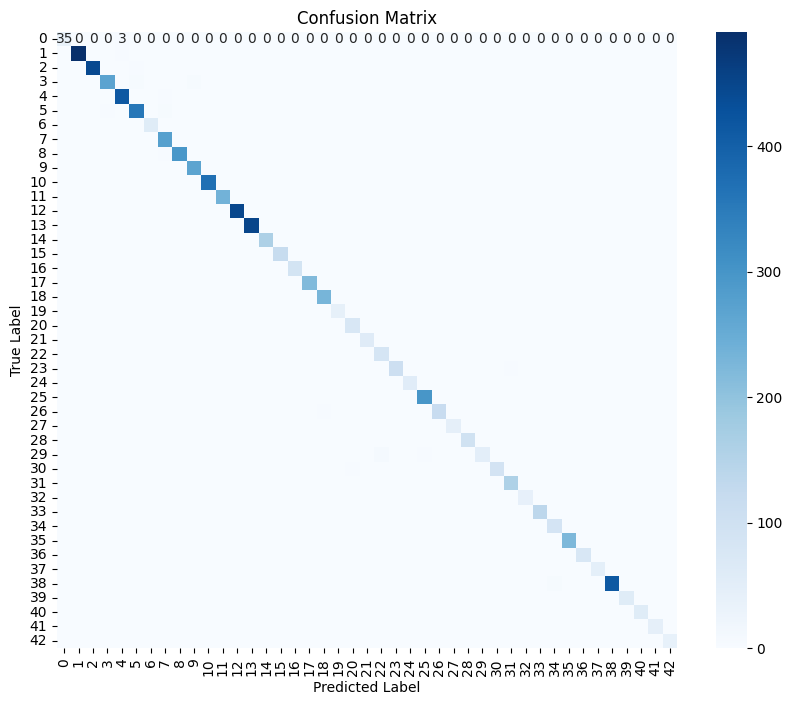

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       1.00      0.99      0.99       496
           2       1.00      0.99      0.99       450
           3       0.99      0.96      0.98       280
           4       0.98      0.99      0.99       418
           5       0.98      0.98      0.98       364
           6       1.00      1.00      1.00        59
           7       0.97      1.00      0.98       278
           8       1.00      0.99      0.99       301
           9       0.98      1.00      0.99       268
          10       0.99      1.00      0.99       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16       0.99      1.00      0.99        90
    

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_val, axis=1)  # Convert one-hot labels back to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


In [10]:
import cv2
import numpy as np

# Class mapping dictionary
classes = { 
    1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)',
    4: 'Speed limit (60km/h)', 5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)',
    7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)', 9: 'Speed limit (120km/h)',
    10: 'No passing', 11: 'No passing veh over 3.5 tons', 12: 'Right-of-way at intersection',
    13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles',
    17: 'Veh > 3.5 tons prohibited', 18: 'No entry', 19: 'General caution',
    20: 'Dangerous curve left', 21: 'Dangerous curve right', 22: 'Double curve',
    23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right',
    26: 'Road work', 27: 'Traffic signals', 28: 'Pedestrians',
    29: 'Children crossing', 30: 'Bicycles crossing', 31: 'Beware of ice/snow',
    32: 'Wild animals crossing', 33: 'End speed + passing limits', 34: 'Turn right ahead',
    35: 'Turn left ahead', 36: 'Ahead only', 37: 'Go straight or right',
    38: 'Go straight or left', 39: 'Keep right', 40: 'Keep left',
    41: 'Roundabout mandatory', 42: 'End of no passing', 43: 'End no passing veh > 3.5 tons'
}

def predict_image(image_path, model):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  # Resize to match training size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model input

    # Predict the class
    prediction = model.predict(img)
    class_id = np.argmax(prediction)  # Get the class with the highest probability

    # Get the class name
    class_name = classes.get(class_id + 1, "Unknown")  # Adjust index for correct mapping

    print(f"Predicted Class: {class_name}")
    return class_name

# Example usage
test_image_path = "D:/Traffic Signal Analysis/archive/Test/00008.png"  # Replace with actual image path
predict_image(test_image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: Road work


'Road work'